In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [109]:
df = pd.read_csv('../data/data.csv')
print(df.head())
print(df.info())

     COUNTRY CODE_TIME          TIME  YEAR  MONTH MONTH_NAME  \
0  Australia   JAN2010  January 2010  2010      1    January   
1  Australia   JAN2010  January 2010  2010      1    January   
2  Australia   JAN2010  January 2010  2010      1    January   
3  Australia   JAN2010  January 2010  2010      1    January   
4  Australia   JAN2010  January 2010  2010      1    January   

                   PRODUCT      VALUE  DISPLAY_ORDER  yearToDate  \
0                    Hydro    990.728              1   16471.891   
1                     Wind    409.469              2    4940.909   
2                    Solar     49.216              3     908.238   
3               Geothermal      0.083              4       0.996   
4  Total combustible fuels  19289.730              7  214302.969   

   previousYearToDate     share  
0                 NaN  0.047771  
1                 NaN  0.019744  
2                 NaN  0.002373  
3                 NaN  0.000004  
4                 NaN  0.930108  
<c

In [110]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 COUNTRY                   0
CODE_TIME                 0
TIME                      0
YEAR                      0
MONTH                     0
MONTH_NAME                0
PRODUCT                   0
VALUE                     0
DISPLAY_ORDER             0
yearToDate                0
previousYearToDate    17105
share                     0
dtype: int64


In [111]:
# Create continent mapping
continent_map = {
    # Europe
    'Finland': 'Europe', 'Denmark': 'Europe', 'Iceland': 'Europe', 'Sweden': 'Europe',
    'Netherlands': 'Europe', 'Norway': 'Europe', 'Luxembourg': 'Europe', 'Switzerland': 'Europe',
    'Austria': 'Europe', 'Belgium': 'Europe', 'Ireland': 'Europe', 'Czechia': 'Europe',
    'Lithuania': 'Europe', 'United Kingdom': 'Europe', 'Slovenia': 'Europe', 'France': 'Europe',
    'Kosovo': 'Europe', 'Romania': 'Europe', 'Estonia': 'Europe', 'Poland': 'Europe',
    'Spain': 'Europe', 'Serbia': 'Europe', 'Malta': 'Europe', 'Italy': 'Europe',
    'Slovakia': 'Europe', 'Latvia': 'Europe', 'Cyprus': 'Europe', 'Portugal': 'Europe',
    'Hungary': 'Europe', 'Croatia': 'Europe', 'Greece': 'Europe', 'Bosnia and Herzegovina': 'Europe',
    'Moldova': 'Europe', 'Montenegro': 'Europe', 'Bulgaria': 'Europe', 'North Macedonia': 'Europe',
    'Albania': 'Europe', 'Ukraine': 'Europe',

    # Middle East
    'Kuwait': 'Middle East', 'Saudi Arabia': 'Middle East',
    'United Arab Emirates': 'Middle East', 'Bahrain': 'Middle East', 'Iraq': 'Middle East',
    'Iran': 'Middle East', 'State of Palestine': 'Middle East', 'Jordan': 'Middle East',
    'Yemen': 'Middle East', 'Lebanon': 'Middle East',

    # Asia
    'Singapore': 'Asia', 'Taiwan Province of China': 'Asia', 'Uzbekistan': 'Asia',
    'Kazakhstan': 'Asia', 'Japan': 'Asia', 'South Korea': 'Asia', 'Philippines': 'Asia',
    'Vietnam': 'Asia', 'Thailand': 'Asia', 'Malaysia': 'Asia', 'China': 'Asia',
    'Kyrgyzstan': 'Asia', 'Mongolia': 'Asia', 'Armenia': 'Asia', 'Georgia': 'Asia',
    'Nepal': 'Asia', 'Laos': 'Asia', 'Azerbaijan': 'Asia', 'Pakistan': 'Asia',
    'Myanmar': 'Asia', 'Cambodia': 'Asia', 'India': 'Asia', 'Sri Lanka': 'Asia',
    'Bangladesh': 'Asia', 'Hong Kong S.A.R. of China': 'Asia', 'Tajikistan': 'Asia',
    'Indonesia': 'Asia',

    # Latin America
    'Costa Rica': 'Latin America', 'Mexico': 'Latin America', 'Uruguay': 'Latin America',
    'El Salvador': 'Latin America', 'Chile': 'Latin America', 'Panama': 'Latin America',
    'Guatemala': 'Latin America', 'Nicaragua': 'Latin America', 'Brazil': 'Latin America',
    'Argentina': 'Latin America', 'Paraguay': 'Latin America', 'Honduras': 'Latin America',
    'Jamaica': 'Latin America', 'Peru': 'Latin America', 'Dominican Republic': 'Latin America',
    'Bolivia': 'Latin America', 'Ecuador': 'Latin America', 'Colombia': 'Latin America',
    'Venezuela': 'Latin America',

    # Africa
    'Libya': 'Africa', 'Mauritius': 'Africa', 'South Africa': 'Africa',
    'Algeria': 'Africa', 'Congo (Brazzaville)': 'Africa', 'Mozambique': 'Africa',
    'Gabon': 'Africa', 'Ivory Coast': 'Africa', 'Guinea': 'Africa', 'Nigeria': 'Africa',
    'Cameroon': 'Africa', 'Namibia': 'Africa', 'Morocco': 'Africa', 'Niger': 'Africa',
    'Burkina Faso': 'Africa', 'Mauritania': 'Africa', 'Gambia': 'Africa', 'Chad': 'Africa',
    'Kenya': 'Africa', 'Tunisia': 'Africa', 'Benin': 'Africa', 'Uganda': 'Africa',
    'Ghana': 'Africa', 'Liberia': 'Africa', 'Mali': 'Africa', 'Madagascar': 'Africa',
    'Togo': 'Africa', 'Ethiopia': 'Africa', 'Tanzania': 'Africa', 'Comoros': 'Africa',
    'Zambia': 'Africa', 'Eswatini': 'Africa', 'Malawi': 'Africa', 'Botswana': 'Africa',
    'Zimbabwe': 'Africa', 'Congo (Kinshasa)': 'Africa', 'Sierra Leone': 'Africa',
    'Lesotho': 'Africa', 'Senegal': 'Africa', 'Egypt': 'Africa',

    # Oceania
    'Australia': 'Oceania', 'New Zealand': 'Oceania',

    # Mixed region
    'Russia': 'Europe/Asia', 'Turkiye': 'Europe/Asia'
}

# Apply mapping and handle missing continents
df["CONTINENT"] = df["COUNTRY"].map(continent_map).fillna("Unknown")

In [112]:
#Total production by country

country_total = df.groupby("COUNTRY")["VALUE"].sum().sort_values(ascending=False)
print(country_total)


COUNTRY
OECD Total             9.242596e+08
IEA Total              9.096110e+08
OECD Americas          4.527393e+08
United States          3.624349e+08
OECD Europe            3.056325e+08
OECD Asia Oceania      1.658877e+08
Japan                  9.367340e+07
India                  7.716980e+07
Germany                5.233599e+07
Canada                 5.125470e+07
Korea                  4.683166e+07
France                 4.332543e+07
Brazil                 2.909683e+07
United Kingdom         2.907350e+07
Mexico                 2.797201e+07
Italy                  2.604113e+07
Spain                  2.335283e+07
Republic of Turkiye    2.305181e+07
Australia              2.182063e+07
Poland                 1.411084e+07
Sweden                 1.297384e+07
Norway                 1.139089e+07
Netherlands            1.059264e+07
Belgium                7.404547e+06
Argentina              7.291167e+06
Czech Republic         7.112194e+06
Chile                  6.494507e+06
Finland             

<Axes: title={'center': 'Total Electricity Production by Year'}, xlabel='YEAR'>

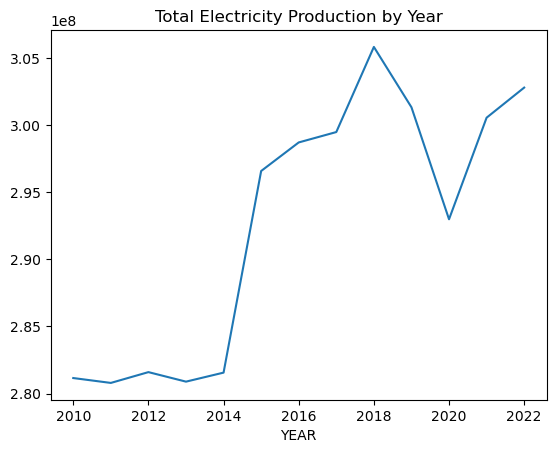

In [113]:
#Total electricity production by year

yearly_total = df.groupby("YEAR")["VALUE"].sum()
yearly_total.plot(kind="line", title="Total Electricity Production by Year")


PRODUCT
Electricity supplied           5.652626e+08
Net electricity production     5.648743e+08
Final consumption              5.226701e+08
Non-renewables                 4.186862e+08
Total combustible fuels        3.329794e+08
Fossil fuels                   3.199421e+08
Low carbon                     2.468221e+08
Coal                           1.553674e+08
Natural gas                    1.469984e+08
Renewables                     1.461857e+08
Nuclear                        9.874406e+07
Hydro                          8.108343e+07
Wind                           3.415691e+07
Distribution losses            3.310850e+07
Total imports                  2.515404e+07
Total exports                  2.476580e+07
Others                         1.757629e+07
Other renewables aggregated    1.731865e+07
Combustible renewables         1.492679e+07
Solar                          1.362672e+07
Name: VALUE, dtype: float64


<Axes: title={'center': 'Top Energy Sources by Total Production'}, xlabel='PRODUCT'>

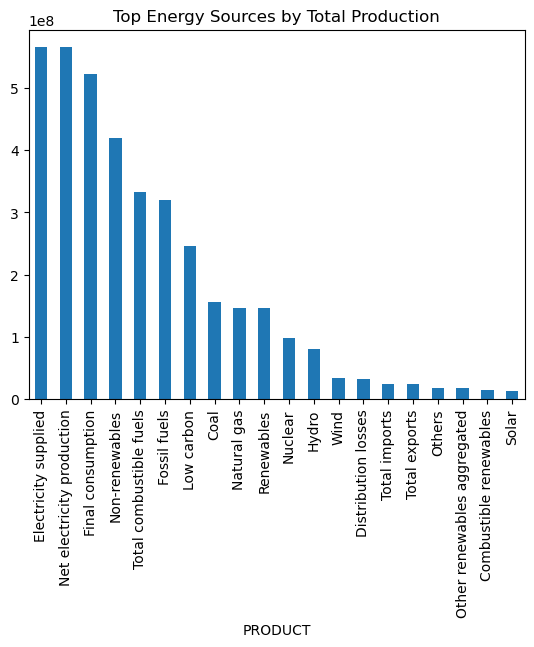

In [114]:
# Top 20 most productive energy sources
source_total = df.groupby("PRODUCT")["VALUE"].sum().sort_values(ascending=False)
print(source_total.head(20))
source_total.head(20).plot(kind="bar", title="Top Energy Sources by Total Production")


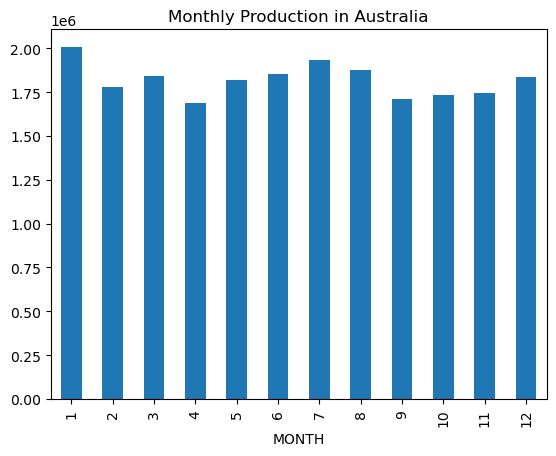

In [115]:
# Monthly production trend for a specific country (Australia)
aus_df = df[df["COUNTRY"] == "Australia"]
aus_df.groupby("MONTH")["VALUE"].sum().plot(kind="bar", title="Monthly Production in Australia")
plt.show()

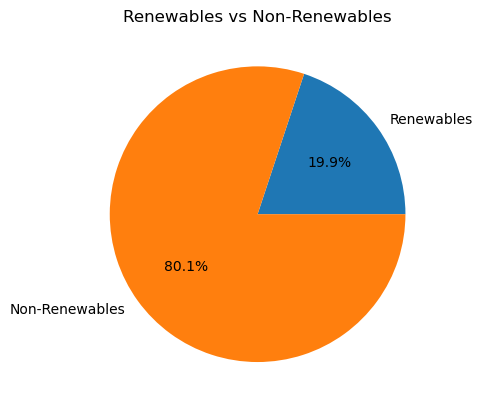

In [158]:
#Comparison of electricity production from renewable vs non-renewable sources
renewables = df[df["PRODUCT"].str.contains("Hydro|Wind|Solar|Other renewables|Combustible renewables", case=False)]["VALUE"].sum()
non_renewables = df[df["PRODUCT"].str.contains("Coal|Natural gas|Oil|Total combustible fuels", case=False)]["VALUE"].sum()
plt.pie([renewables, non_renewables], labels=["Renewables", "Non-Renewables"], autopct="%1.1f%%")
plt.title("Renewables vs Non-Renewables")
plt.show()


<Axes: title={'center': 'Average Monthly Electricity Production'}, xlabel='MONTH_NAME'>

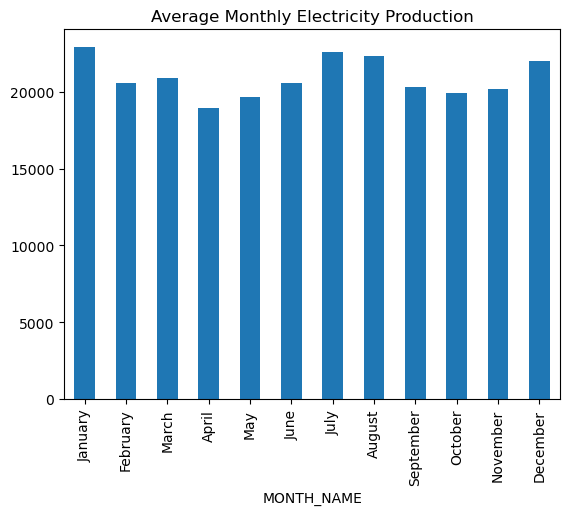

In [117]:
#Average Monthly Electricity Production
monthly_avg = df.groupby("MONTH_NAME")["VALUE"].mean().reindex([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
])
monthly_avg.plot(kind="bar", title="Average Monthly Electricity Production")


<Axes: title={'center': 'Share of Renewables Over Time (%)'}, xlabel='YEAR'>

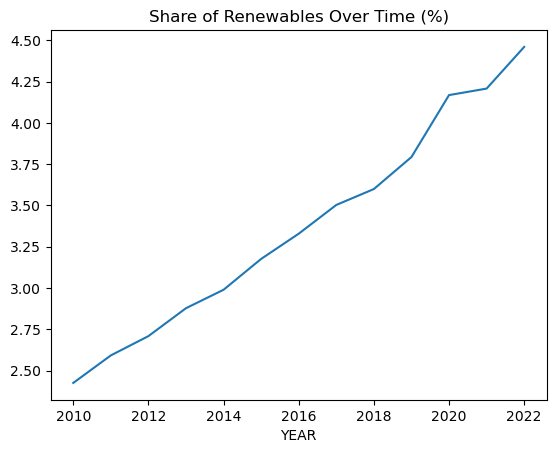

In [118]:
#Share of Renewables Over Time (%)
renew_yearly = df[df["PRODUCT"].str.contains("Hydro|Wind|Solar", case=False)].groupby("YEAR")["VALUE"].sum()
total_yearly = df.groupby("YEAR")["VALUE"].sum()

share_renew = (renew_yearly / total_yearly) * 100
share_renew.plot(kind="line", title="Share of Renewables Over Time (%)")


COUNTRY
OECD Total             3.308954e+06
IEA Total              3.252181e+06
OECD Europe            1.506510e+06
OECD Americas          9.657639e+05
OECD Asia Oceania      8.366802e+05
United States          8.259103e+05
Japan                  5.543602e+05
Germany                4.846032e+05
India                  3.467374e+05
Italy                  2.639054e+05
Spain                  1.995112e+05
Australia              1.632382e+05
Korea                  1.180891e+05
France                 1.164645e+05
United Kingdom         1.023523e+05
Brazil                 6.256879e+04
Republic of Turkiye    5.997132e+04
Netherlands            5.414579e+04
Chile                  5.202431e+04
Mexico                 4.771209e+04
Name: VALUE, dtype: float64


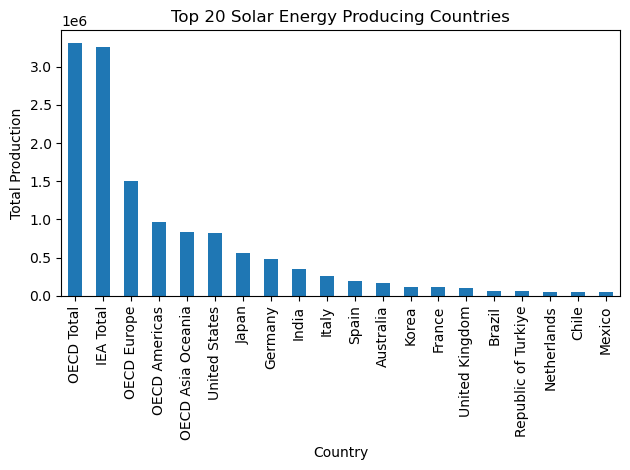

In [119]:
#Top countries in solar energy production
solar_production = df[df["PRODUCT"].str.contains("Solar", case=False)].groupby("COUNTRY")["VALUE"].sum().sort_values(ascending=False)
print(solar_production.head(20))

solar_production.head(20).plot(kind="bar", title="Top 20 Solar Energy Producing Countries")
plt.ylabel("Total Production")
plt.xlabel("Country")
plt.tight_layout()
plt.show()


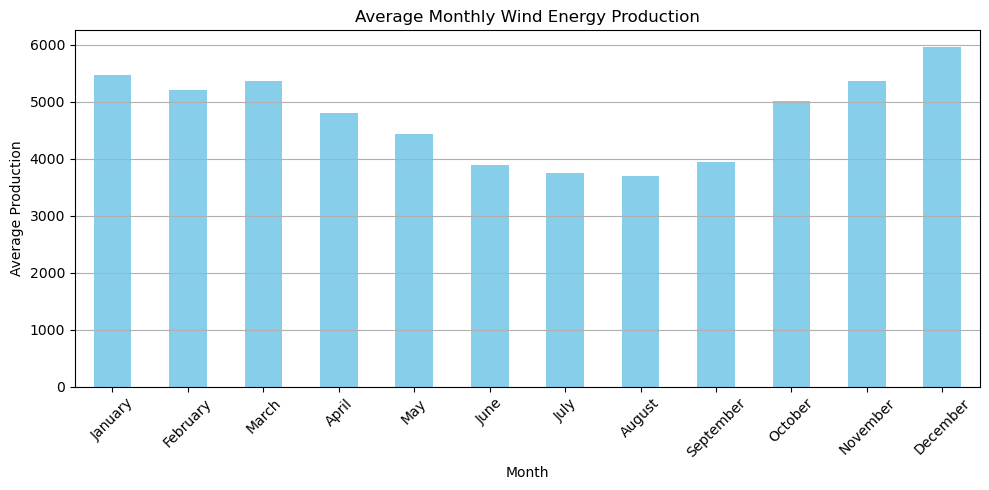

In [120]:
#Average Monthly Wind Energy Production

wind_df = df[df["PRODUCT"] == "Wind"]

monthly_avg_wind = (
    wind_df.groupby("MONTH_NAME")["VALUE"] .mean().reindex([
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"  ]))
monthly_avg_wind.plot(kind="bar", figsize=(10, 5), color="skyblue", title="Average Monthly Wind Energy Production")
plt.xlabel("Month")
plt.ylabel("Average Production")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis="y")
plt.show()


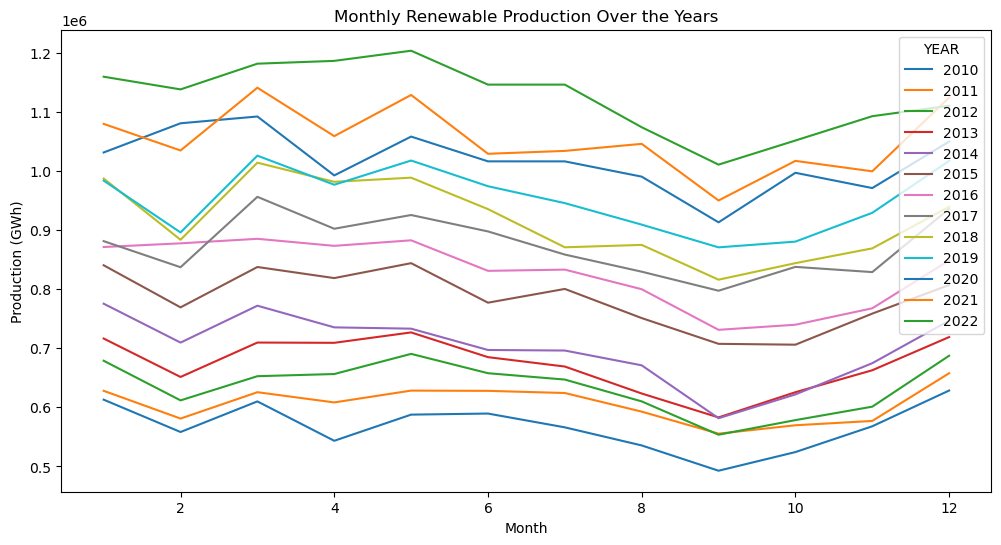

In [121]:
#Monthly Renewable Production Over the Years
renew_df = df[df["PRODUCT"].str.contains("Hydro|Solar|Wind", case=False)]
monthly_trend = renew_df.groupby(["YEAR", "MONTH"])["VALUE"].sum().unstack().T
monthly_trend.plot(figsize=(12, 6), title="Monthly Renewable Production Over the Years")
plt.xlabel("Month")
plt.ylabel("Production (GWh)")
plt.show()


In [122]:
top_sources = df.groupby(["COUNTRY", "PRODUCT"])["VALUE"].sum()
top_sources = top_sources.groupby(level=0, group_keys=False).nlargest(10)
print(top_sources)


COUNTRY        PRODUCT                   
Argentina      Electricity supplied          1.117895e+06
               Net electricity production    1.115406e+06
               Final consumption             8.341122e+05
               Non-renewables                8.262345e+05
               Total combustible fuels       7.777827e+05
                                                 ...     
United States  Fossil fuels                  3.482059e+07
               Low carbon                    1.916159e+07
               Coal                          1.716032e+07
               Natural gas                   1.700318e+07
               Nuclear                       1.031649e+07
Name: VALUE, Length: 520, dtype: float64


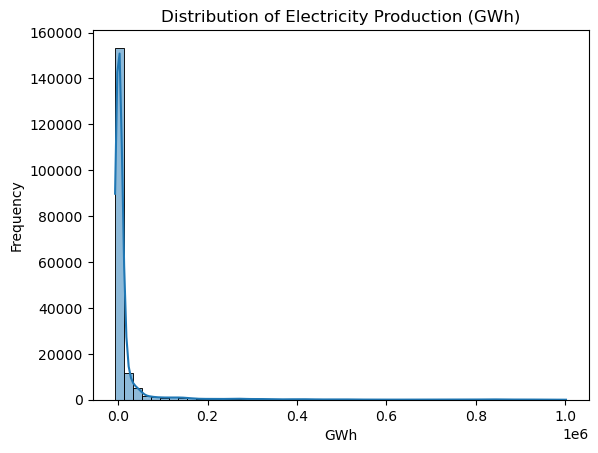

In [123]:
#Distribution of energy production values using a histogram
sns.histplot(df["VALUE"], bins=50, kde=True)
plt.title("Distribution of Electricity Production (GWh)")
plt.xlabel("GWh")
plt.ylabel("Frequency")
plt.show()

In [124]:
#Detecting outliers in energy production values
mean_val = df["VALUE"].mean()
std_val = df["VALUE"].std()
df["Z_SCORE"] = (df["VALUE"] - mean_val) / std_val
outliers = df[abs(df["Z_SCORE"]) > 3]
print(outliers[["COUNTRY", "PRODUCT", "VALUE", "TIME"]])


              COUNTRY                     PRODUCT          VALUE  \
311         IEA Total     Total combustible fuels  587612.881000   
312         IEA Total                        Coal  329335.711000   
318         IEA Total  Net electricity production  943609.626000   
321         IEA Total        Electricity supplied  946083.601000   
324         IEA Total           Final consumption  877213.615000   
...               ...                         ...            ...   
181637     OECD Total                Fossil fuels  489939.125106   
181901  United States  Net electricity production  369604.059764   
181904  United States        Electricity supplied  372975.265154   
181907  United States           Final consumption  343222.453509   
181910  United States              Non-renewables  292417.548132   

                 TIME  
311      January 2010  
312      January 2010  
318      January 2010  
321      January 2010  
324      January 2010  
...               ...  
181637  Decembe

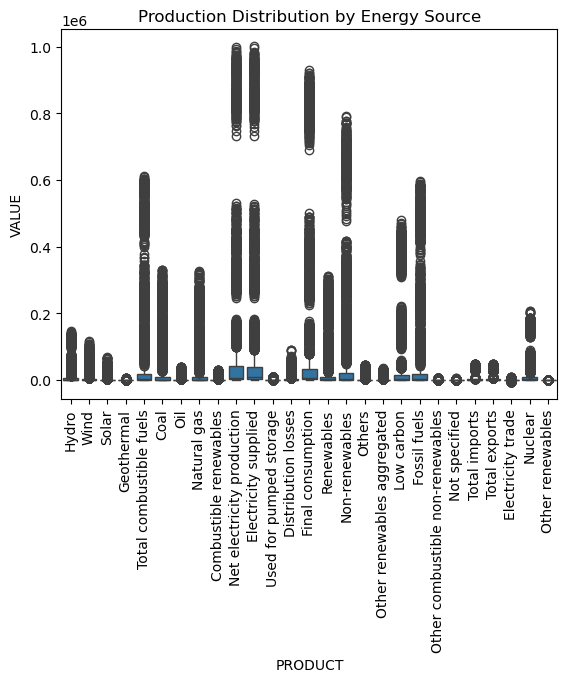

In [125]:
sns.boxplot(x="PRODUCT", y="VALUE", data=df)
plt.xticks(rotation=90)
plt.title("Production Distribution by Energy Source")
plt.show()


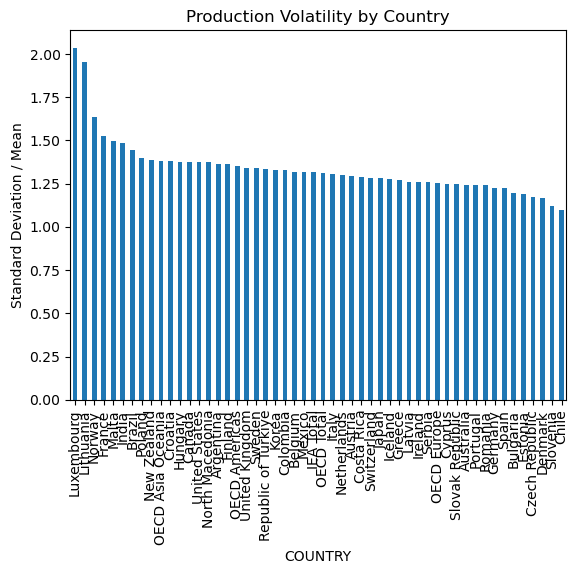

In [126]:
volatility = df.groupby("COUNTRY")["VALUE"].std() / df.groupby("COUNTRY")["VALUE"].mean()
volatility.sort_values(ascending=False).plot(kind="bar", title="Production Volatility by Country")
plt.ylabel("Standard Deviation / Mean")
plt.show()


In [127]:
#Years with lowest production
min_years = df.groupby("YEAR")["VALUE"].sum().sort_values().head(5)
print("Years with lowest production:")
print(min_years)


Years with lowest production:
YEAR
2011    2.807929e+08
2013    2.808882e+08
2010    2.811565e+08
2014    2.815608e+08
2012    2.815982e+08
Name: VALUE, dtype: float64


In [128]:
# Calculate renewable production by continent
renew_cont = df[df["PRODUCT"].str.contains("Hydro|Wind|Solar", case=False)].groupby("CONTINENT")["VALUE"].sum()
print("Renewable Production by Continent (GWh):")
print(renew_cont)

Renewable Production by Continent (GWh):
CONTINENT
Asia             3.827335e+06
Europe           1.076388e+07
Latin America    5.258212e+06
Oceania          9.155263e+05
Unknown          1.081021e+08
Name: VALUE, dtype: float64


Renewable Share by Continent (%):
CONTINENT
Asia             2.240262
Europe           4.698373
Latin America    6.970271
Oceania          3.606898
Unknown          3.272239
Name: VALUE, dtype: float64


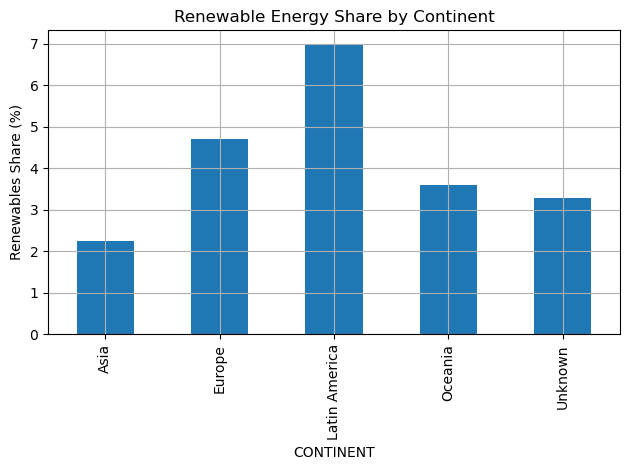

In [129]:
total_cont = df.groupby("CONTINENT")["VALUE"].sum()
renew_share_cont = (renew_cont / total_cont) * 100
print("Renewable Share by Continent (%):")
print(renew_share_cont)

renew_share_cont.plot(kind="bar", title="Renewable Energy Share by Continent")
plt.ylabel("Renewables Share (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


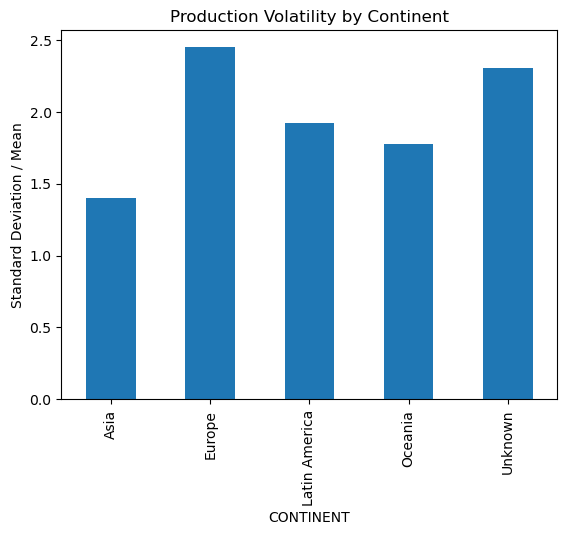

In [162]:
#Production Volatility by Continent
volatility_cont = df.groupby("CONTINENT")["VALUE"].std() / df.groupby("CONTINENT")["VALUE"].mean()
volatility_cont.plot(kind="bar", title="Production Volatility by Continent")
plt.ylabel("Standard Deviation / Mean")
plt.show()